<h1 style="text-align: center;">Desafío - Estimando curvas de densidad de probabilidad</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.

## Habilidades a evaluar
- Conocer las convenciones y principios rectores de la visualización de gráficos.
- Describir la Ley de los Grandes Números y Teorema del Límite Central y su importancia en la inferencia estadística.

## Descripción
La empresa en la cual usted trabaja quedó muy satisfecha con su análisis anterior del Índice de Desarrollo Humano (IDH) de diversos países, el cual se elaboró para el Ministerio de
Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Por consiguiente, esta vez le solicitan que, a partir del trabajo hecho en el Desafío precedente, usted pueda seguir profundizando en la base de datos Quality of Government, de la Universidad de Gotemburgo.

## Requerimientos
A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.

### 1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la sesión pasada

In [46]:
# Utiliza esta celda para importar módulos y el set de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('subsample_RS_demo.csv')
df.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname
0,0.495,LSO,SubSaharian,1539.79000,NaN,74.199997,2.39,25.400000,10.617677,Lesotho
1,0.790,BHS,Caribbean,21672.02900,0.356,NaN,9.45,NaN,7.742365,Bahamas
2,0.784,ATG,Caribbean,12257.71000,NaN,NaN,8.56,NaN,5.541683,Antigua and Barbuda
3,0.894,FRA,WesternDem,34007.89800,64.028,3.400000,11.50,28.100000,11.539519,France (1963-)
4,0.414,MOZ,SubSaharian,852.39001,25.733,63.099998,1.16,18.799999,6.975582,Mozambique


### 2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
- Generar un archivo `ancilliary_funcs.py` para guardar las funciones creadas en la sesión pasada e importe.
- Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra importada.

In [47]:
# Utiliza esta celda para importar ancilliary_funcs. Recordar que el archivo debe estar en la misma ruta del notebook, y no se debe incluir el .py
import ancilliary_funcs as fun

In [48]:
# Utiliza esta celda para inspeccionar los datos nulos
for var in df.columns:
    cantidad, _, _ = fun.fetch_null_cases(df, var, print_list=True)
    print(f"La columna {var} tiene {cantidad} de casos perdidos")

La columna undp_hdi tiene 4 de casos perdidos
La columna ccodealp tiene 0 de casos perdidos
La columna ht_region tiene 0 de casos perdidos
La columna gle_cgdpc tiene 0 de casos perdidos
La columna imf_pop tiene 29 de casos perdidos
La columna wef_imort tiene 22 de casos perdidos
La columna who_alc2000 tiene 5 de casos perdidos
La columna who_tobt tiene 39 de casos perdidos
La columna wdi_exph tiene 1 de casos perdidos
La columna cname tiene 0 de casos perdidos


In [53]:
fun.fetch_descriptives(df, df.columns)

(       ccodealp    ht_region    cname
 count        97           97       97
 unique       97           10       97
 top         LSO  SubSaharian  Lesotho
 freq          1           27        1,
         undp_hdi      gle_cgdpc     imf_pop  wef_imort  who_alc2000  \
 count  93.000000      97.000000   68.000000  75.000000    92.000000   
 mean    0.691505   15509.761373   25.593471  25.490667     4.869130   
 std     0.159842   19528.486559   41.687245  22.792490     3.745891   
 min     0.347000     324.160000    0.011000   1.700000     0.000000   
 25%     0.548000    2685.500000    1.222250   6.100000     1.312500   
 50%     0.724000    9610.599600    7.184500  15.100000     4.445000   
 75%     0.804000   19768.039000   32.477500  43.100000     8.052500   
 max     0.924000  108481.130000  202.768997  76.199997    12.680000   
 
         who_tobt   wdi_exph  
 count  58.000000  96.000000  
 mean   23.043104   6.655695  
 std    10.687000   2.525623  
 min     7.000000   2.067386  

### 3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la menor cantidad de datos perdidos (o que no posea).
- Generar una nueva columna en la tabla de datos que contenga el puntaje Z de dicha variable. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:
$$
\begin{align}
z_i = (x_i - \bar X / \sigma)
\end{align}
$$

- Para ordenar los valores pueden utilizar la función `sort_values` del DataFrame analizado. Lean la documentación asociada al parámetro `by`.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con `dropna`. Lean la documentación asociada al argumento `subset`.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.

In [54]:
df.dtypes

undp_hdi       float64
ccodealp        object
ht_region       object
gle_cgdpc      float64
imf_pop        float64
wef_imort      float64
who_alc2000    float64
who_tobt       float64
wdi_exph       float64
cname           object
dtype: object

In [63]:
ind = df.isnull().sum().sort_values(ascending=True)
ind

ccodealp        0
ht_region       0
gle_cgdpc       0
cname           0
wdi_exph        1
undp_hdi        4
who_alc2000     5
wef_imort      22
imf_pop        29
who_tobt       39
dtype: int64

In [65]:
# Utiliza esta celda para generar el puntaje z, ordenar los valores con sort_values, y eliminar los datos nulos con dropna
ind = df.isnull().sum().sort_values().index[2]
ind

'gle_cgdpc'

In [76]:
# Utiliza esta celda para seleccionar y mostrar las primeras 10 observaciones

var = df.loc[:,ind]
df['var_Z'] = (var - var.mean())/var.std()
df = df.dropna(subset = [ind]).sort_values(by = 'var_Z')
df.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname,var_Z
78,0.425,COD,SubSaharian,324.16000,NaN,74.500000,1.82,NaN,4.328234,"Congo, Democratic Republic",-0.777613
21,0.678,SLV,LatAm,332.26999,NaN,13.600000,2.52,NaN,6.772403,El Salvador,-0.777198
39,0.406,BDI,SubSaharian,663.57001,NaN,66.900002,4.16,NaN,7.535565,Burundi,-0.760233
79,0.347,CAF,SubSaharian,690.03998,NaN,NaN,1.66,NaN,4.200222,Central African Republic,-0.758877
84,0.511,MDG,SubSaharian,822.62000,NaN,40.900002,0.87,NaN,3.041355,Madagascar,-0.752088
4,0.414,MOZ,SubSaharian,852.39001,25.733,63.099998,1.16,18.799999,6.975582,Mozambique,-0.750564
51,0.473,MWI,SubSaharian,938.34998,17.604,46.000000,1.23,16.299999,11.377956,Malawi,-0.746162
20,0.498,COM,SubSaharian,972.35999,0.776,NaN,0.12,15.300000,6.747643,Comoros,-0.744420
22,0.414,GIN,SubSaharian,993.83002,11.745,65.199997,0.22,NaN,5.644798,Guinea,-0.743321
50,0.418,ERI,SubSaharian,1007.28000,NaN,NaN,0.62,NaN,3.338293,Eritrea,-0.742632


In [73]:
promedio = df["gle_cgdpc"].mean()
promedio

15509.761372989691

In [74]:
desv = df["gle_cgdpc"].std()
desv

19528.486558837354

In [77]:
a = (324.16000- 15509.761372989691) / 19528.486558837354
a

-0.7776128133246276

In [16]:
# Utiliza esta celda para seleccionar y mostrar las últimas 10 observaciones
df.tail(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname,flagnull,var_Z
43,0.902,JPN,EastAsia,36123.770,127.120003,2.2,7.55,22.799999,10.228745,Japan,False,1.250840
28,0.919,CAN,WesternDem,36577.078,35.495998,4.7,8.10,16.200001,10.449582,Canada,False,1.277133
13,0.892,AUT,WesternDem,38868.039,8.544000,3.3,12.32,NaN,11.205473,Austria,False,1.410014
42,0.909,SWE,WesternDem,39000.910,9.645000,2.3,7.30,21.900000,11.929840,Sweden,False,1.417721
69,0.918,USA,WesternDem,47769.699,318.789001,6.0,8.82,18.100000,17.140755,United States,False,1.926333
37,0.938,CHE,WesternDem,50454.410,8.140000,3.7,9.61,24.100000,11.659268,Switzerland,False,2.082053
2,0.924,SGP,SouthEastAsia,54268.148,5.470000,2.3,1.83,16.200001,4.922792,Singapore,False,2.303259
34,0.948,NOR,WesternDem,57634.770,5.156000,2.2,6.06,24.100000,9.719718,Norway,False,2.498532
29,0.896,LUX,WesternDem,61404.480,0.550000,1.7,11.12,24.400000,6.937873,Luxembourg,False,2.717184
9,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,Monaco,False,5.447748


**¿Qué características en común se encuentran?**

**Respuesta:** Tengo entendido que el gle_cgdpc es el Pib percapita, se aprecia que los paises menos desarrollados pertenecientes a las regiones de SubSaharian tiene valores z menores a diferencia de los paises desarrollados o del primer mundo que principalmente son de la region WesternDem.

In [78]:
#df['z1']= (df['undp_hdi'] -df['undp_hdi'].mean())/np.std(df['undp_hdi'])
#df['z3']= (df['imf_pop'] -df['imf_pop'].mean())/np.std(df['imf_pop'])
#df['z4']= (df['wef_imort'] -df['wef_imort'].mean())/np.std(df['wef_imort'])
#df['z5']= (df['who_alc2000'] -df['who_alc2000'].mean())/np.std(df['who_alc2000'])
#df['z5']= (df['who_tobt'] -df['who_tobt'].mean())/np.std(df['who_tobt'])
#df['z2']= (df['gle_cgdpc'] -df['gle_cgdpc'].mean())/np.std(df['gle_cgdpc'])

In [79]:
df['z5']= (df['wdi_exph'] -df['wdi_exph'].mean())/np.std(df['wdi_exph'])
df = df.dropna(subset = ['wdi_exph']).sort_values(by = 'z5')

df.head(10)

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,cname,var_Z,z5
91,0.688,TKM,EastEurope,13217.3900,NaN,NaN,2.90,NaN,2.067386,Turkmenistan,-0.117386,-1.826241
82,0.552,MMR,SouthEastAsia,5733.3701,51.418999,41.099998,0.70,20.000000,2.275755,Myanmar,-0.500622,-1.743306
27,0.548,PAK,SouthAsia,2855.5500,186.190002,69.300003,0.04,22.600000,2.613916,Pakistan (1971-),-0.647987,-1.608711
94,0.864,BRN,SouthEastAsia,46103.8400,0.412000,5.600000,0.97,16.400000,2.648163,Brunei,1.566638,-1.595080
84,0.511,MDG,SubSaharian,822.6200,NaN,40.900002,0.87,NaN,3.041355,Madagascar,-0.752088,-1.438581
74,0.799,KWT,NorthAfrica,64342.7110,3.999000,9.500000,0.02,NaN,3.042368,Kuwait,2.500601,-1.438178
41,0.553,SYR,NorthAfrica,4284.4199,NaN,14.200000,0.76,NaN,3.254531,Syria,-0.574819,-1.353733
12,NaN,NRU,Pacific,3130.4700,0.012000,NaN,NaN,48.900002,3.326649,Nauru,-0.633909,-1.325028
50,0.418,ERI,SubSaharian,1007.2800,NaN,NaN,0.62,NaN,3.338293,Eritrea,-0.742632,-1.320394
43,0.694,GAB,SubSaharian,14525.2800,NaN,42.400002,8.86,NaN,3.437472,Gabon,-0.050413,-1.280919


### 4. Estimar el puntaje z de las regiones (2 puntos). 
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
- Para ello realice un `dotplot` que muestre el valor promedio de su variable por cada región.
- Agregue además una línea que muestre el promedio total de la variable (es decir, antes de agrupar)

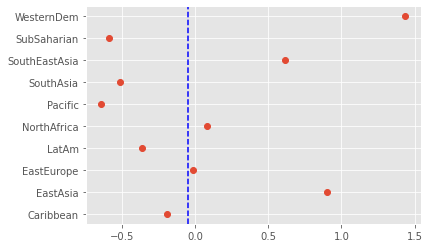

In [84]:
# Utiliza esta celda para realizar el gráfico solicitado

plt.style.use('ggplot') # estilo opcional
new_data = df.groupby('ht_region')['var_Z'].mean()
plt.plot(new_data, new_data.index, 'o')
plt.axvline(df['var_Z'].mean(), c = 'b', ls = '--')
plt.show()


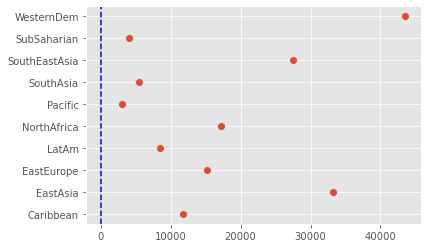

In [83]:
plt.style.use('ggplot') # estilo opcional
new_data = df.groupby('ht_region')['gle_cgdpc'].mean()
plt.plot(new_data, new_data.index, 'o')
plt.axvline(df['var_Z'].mean(), c = 'b', ls = '--')
plt.show()

**Comentarios de los resultados**

In [87]:
#Se aprecia que cambia el grafico al estandarizarse y los puntos se encuentra graficamente en las mismas posiciones.

### 5. Generar curvas de Densidad de Probabilidad (2 puntos).
- Cree una función que permita visualizar las curvas de Densidad de Probabilidad para las variables `imf_pop`, `gle_cgdpc` y `wdi_exph`.
- La función debe contener como argumentos:
    - `df`: Tabla de datos.
    - `variable`: Variable a contrastar.

In [88]:
# Utiliza esta celda para definir la función solicitada
from scipy import stats


def plot_densities(df, variable):
    
    mu_1 = df[variable].dropna().mean()
    sigma_1 = np.std(df[variable].dropna())
    
    infer_x_axis = np.linspace(df[variable].min(), df[variable].max())
    plt.plot(infer_x_axis,
        stats.norm.pdf(infer_x_axis, mu_1, sigma_1),
        label = f"Curva de Densidad PDF para {variable}")
    plt.legend()


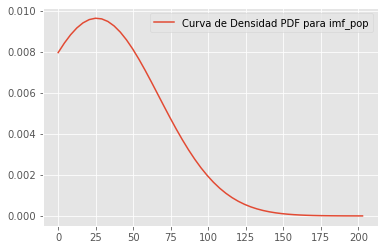

In [89]:
# Utiliza esta celda para llamar la función para imf_pop
plot_densities(df, 'imf_pop')

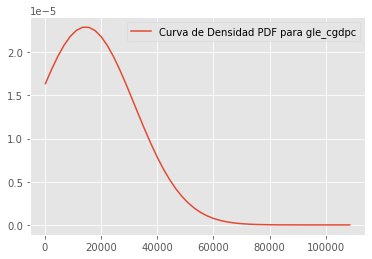

In [90]:
# Utiliza esta celda para llamar la función para gle_cgdpc
plot_densities(df,'gle_cgdpc')


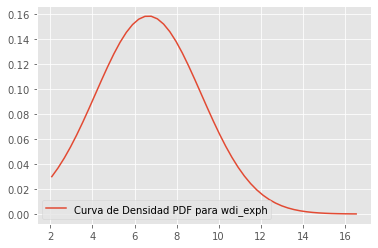

In [91]:
# Utiliza esta celda para llamar la función para wdi_exph
plot_densities(df,'wdi_exph')

**Comentarios de los resultados**

In [ ]:
#para 'wdi_exph' tiene una distribución normal, sus datos principlamente estan concentrados entorno a la media, las dos restantes
#tienen un comportamiento normal pero su diferencia es que los rangos de datos son mayores.